In [48]:
!pip install selenium

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [49]:
import pandas as pd
import numpy as np
import tweepy
import re 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re
from nltk.tokenize import sent_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs
from selenium import webdriver

#Selecting 'Apple iPhone 11 pro max:: (64GB) - Midnight' for reviews


In [50]:
iphone_reviews = []

In [51]:
for i in range (1,31):
    op=[]
    url ="https://www.amazon.com/Apple-iPhone-64GB-Midnight-Green/product-reviews/B08BHXG144/ref=cm_cr_othr_d_show_all_btm?ie=UTF8&reviewerType=all_reviews"+str(i)
    response = requests.get(url)
    soup = bs(response.content,"html.parser")
    reviews = soup.findAll("span",attrs = {"class","a-size-base review-text review-text-content"})
    for i in range(len(reviews)):
        op.append(reviews[i].text)    
    iphone_reviews = iphone_reviews+op

In [52]:
iphone_reviews

[]

In [53]:
reviews = ' '.join(iphone_reviews)

In [54]:
#Data Cleaning

In [55]:
reviews = re.sub("[^A-Za-z" "]+"," ",reviews).lower() 
reviews = re.sub("[0-9" "]+"," ",reviews).lower() 
reviews = re.sub(r'^https?:\/\/.*[\r\n]*', '', reviews).lower()

#Tokenize

In [56]:
import nltk
nltk.download('punkt')
reviews_token = word_tokenize(reviews)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [46]:
import nltk
nltk.download('stopwords')
reviews_without_sw = [word for word in reviews_token if not word in stopwords.words()]

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
reviews_without_sw

['bought',
 'phone',
 'small',
 'prefer',
 'small',
 'phones',
 'half',
 'things',
 'android',
 'ios',
 'app',
 'extra',
 'click',
 'tap',
 'compared',
 'android',
 'phone',
 'day',
 'calls',
 'messages',
 'work',
 'photo',
 'video',
 'plants',
 'pixels',
 'give',
 'experience',
 'iphone',
 'powerful',
 'phone',
 'generation',
 'powerful',
 'chip',
 'handy',
 'battery',
 'juice',
 'day',
 'perfect',
 'size',
 'phone',
 'sum',
 'mind',
 'hate',
 'iphones',
 'work',
 'phone',
 'iphone',
 'sony',
 'xperia',
 'user',
 'sony',
 'arc',
 'times',
 'choice',
 'move',
 'away',
 'form',
 'sony',
 'portfolio',
 'sell',
 'india',
 'anymore',
 'xz',
 'working',
 'years',
 'repeat',
 'hate',
 'iphones',
 'deliberation',
 'mini',
 'mini',
 'wanted',
 'phone',
 'single',
 'hand',
 'fits',
 'perfect',
 'great',
 'deal',
 'purchase',
 'net',
 'amt',
 'paid',
 'rs',
 'card',
 'discounts',
 'cheaper',
 'lot',
 'android',
 'phones',
 'high',
 'configuration',
 'performance',
 'smooth',
 'fast',
 'id',
 'wo

In [57]:
reviews=' '.join(reviews_without_sw)

#WordCloud


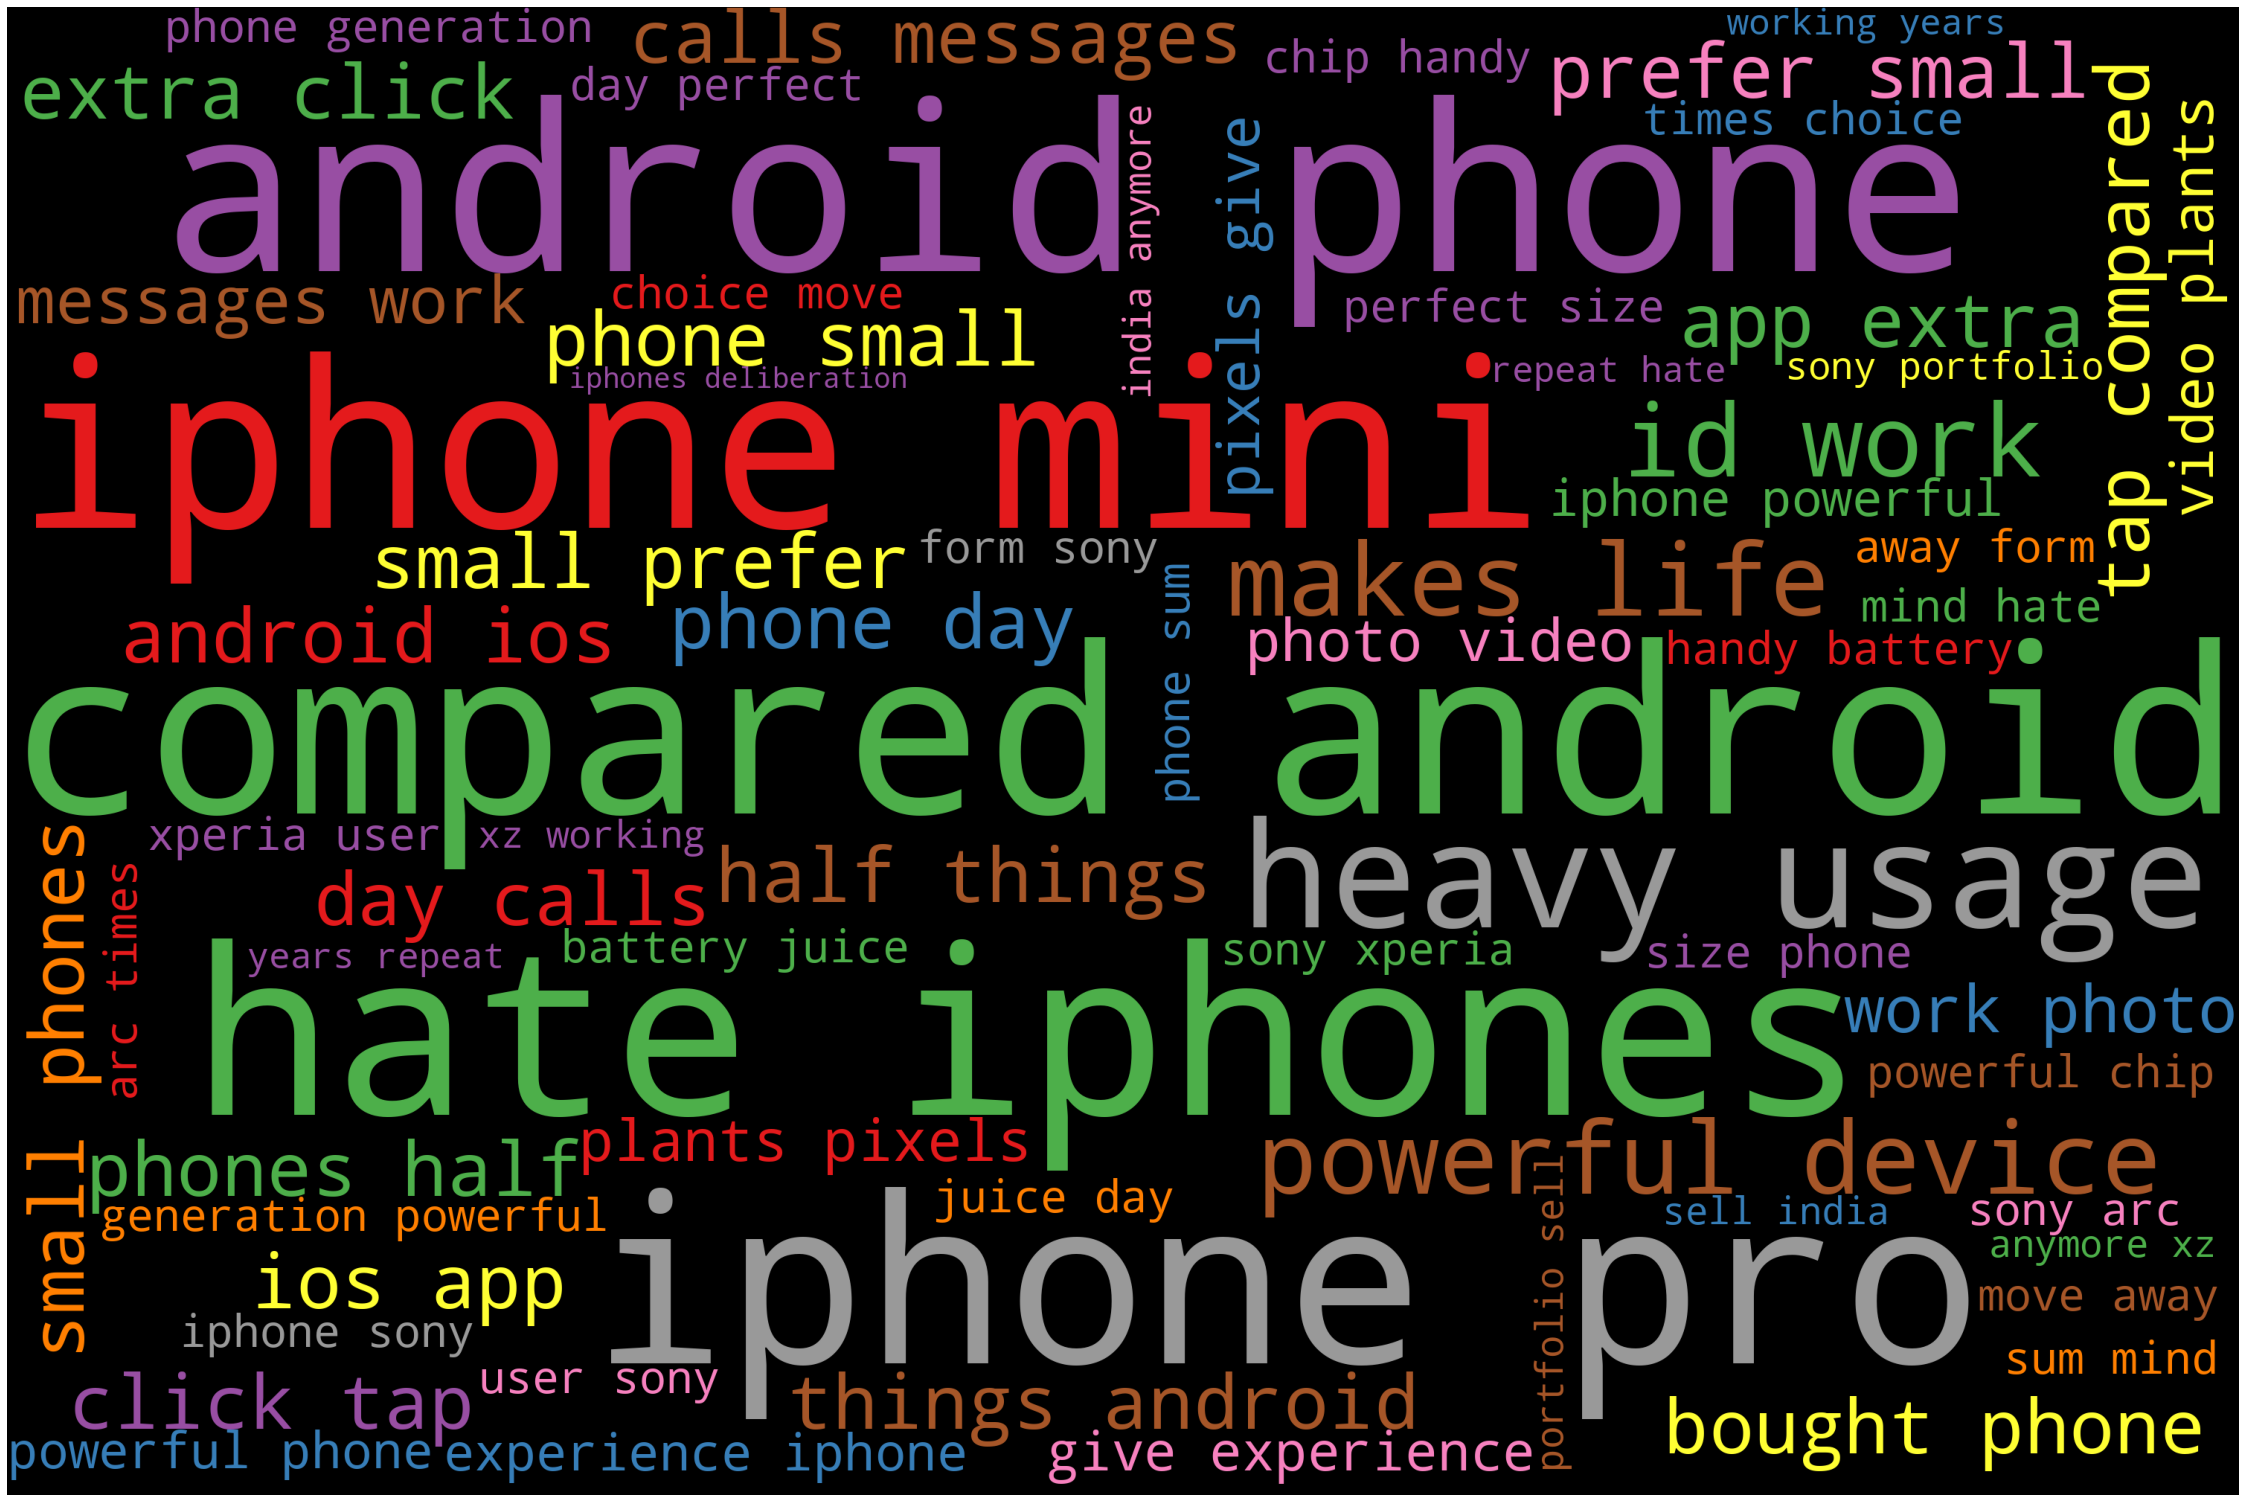

In [58]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
#STOPWORDS.add('refresh')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews)
plot_cloud(wordcloud)

#Emotion Mining

In [59]:
from google.colab import files
uploaded=files.upload()

Saving negative-words.txt to negative-words (1).txt


In [60]:
with open("negative-words.txt", encoding='Latin-1') as f:
    negative=f.read().split("\n")

In [61]:
negative

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '; Opinion Lexicon: Negative',
 ';',
 '; This file contains a list of NEGATIVE opinion words (or sentiment words).',
 ';',
 '; This file and the papers can all be downloaded from ',
 ';    http://www.cs.uic.edu/~liub/FBS/sentiment-analysis.html',
 ';',
 '; If you use this list, please cite one of the following two papers:',
 ';',
 ';   Minqing Hu and Bing Liu. "Mining and Summarizing Customer Reviews." ',
 ';       Proceedings of the ACM SIGKDD International Conference on Knowledge ',
 ';       Discovery and Data Mining (KDD-2004), Aug 22-25, 2004, Seattle, ',
 ';       Washington, USA, ',
 ';   Bing Liu, Minqing Hu and Junsheng Cheng. "Opinion Observer: Analyzing ',
 ';       and Comparing Opinions on the Web." Proceedings of the 14th ',
 ';       International World Wide Web conference (WWW-2005), May 10-14, ',
 ';       2005, Chiba, Japan.',
 ';',
 '; Notes: ',
 ';    1. The appearance of an o

In [62]:
negative.index('2-faced')

35

In [63]:
negative = negative[35:]

In [64]:
reviews_negative=' '.join([word for word in reviews_without_sw if word in negative])

#WordCloud for Negative Reviews

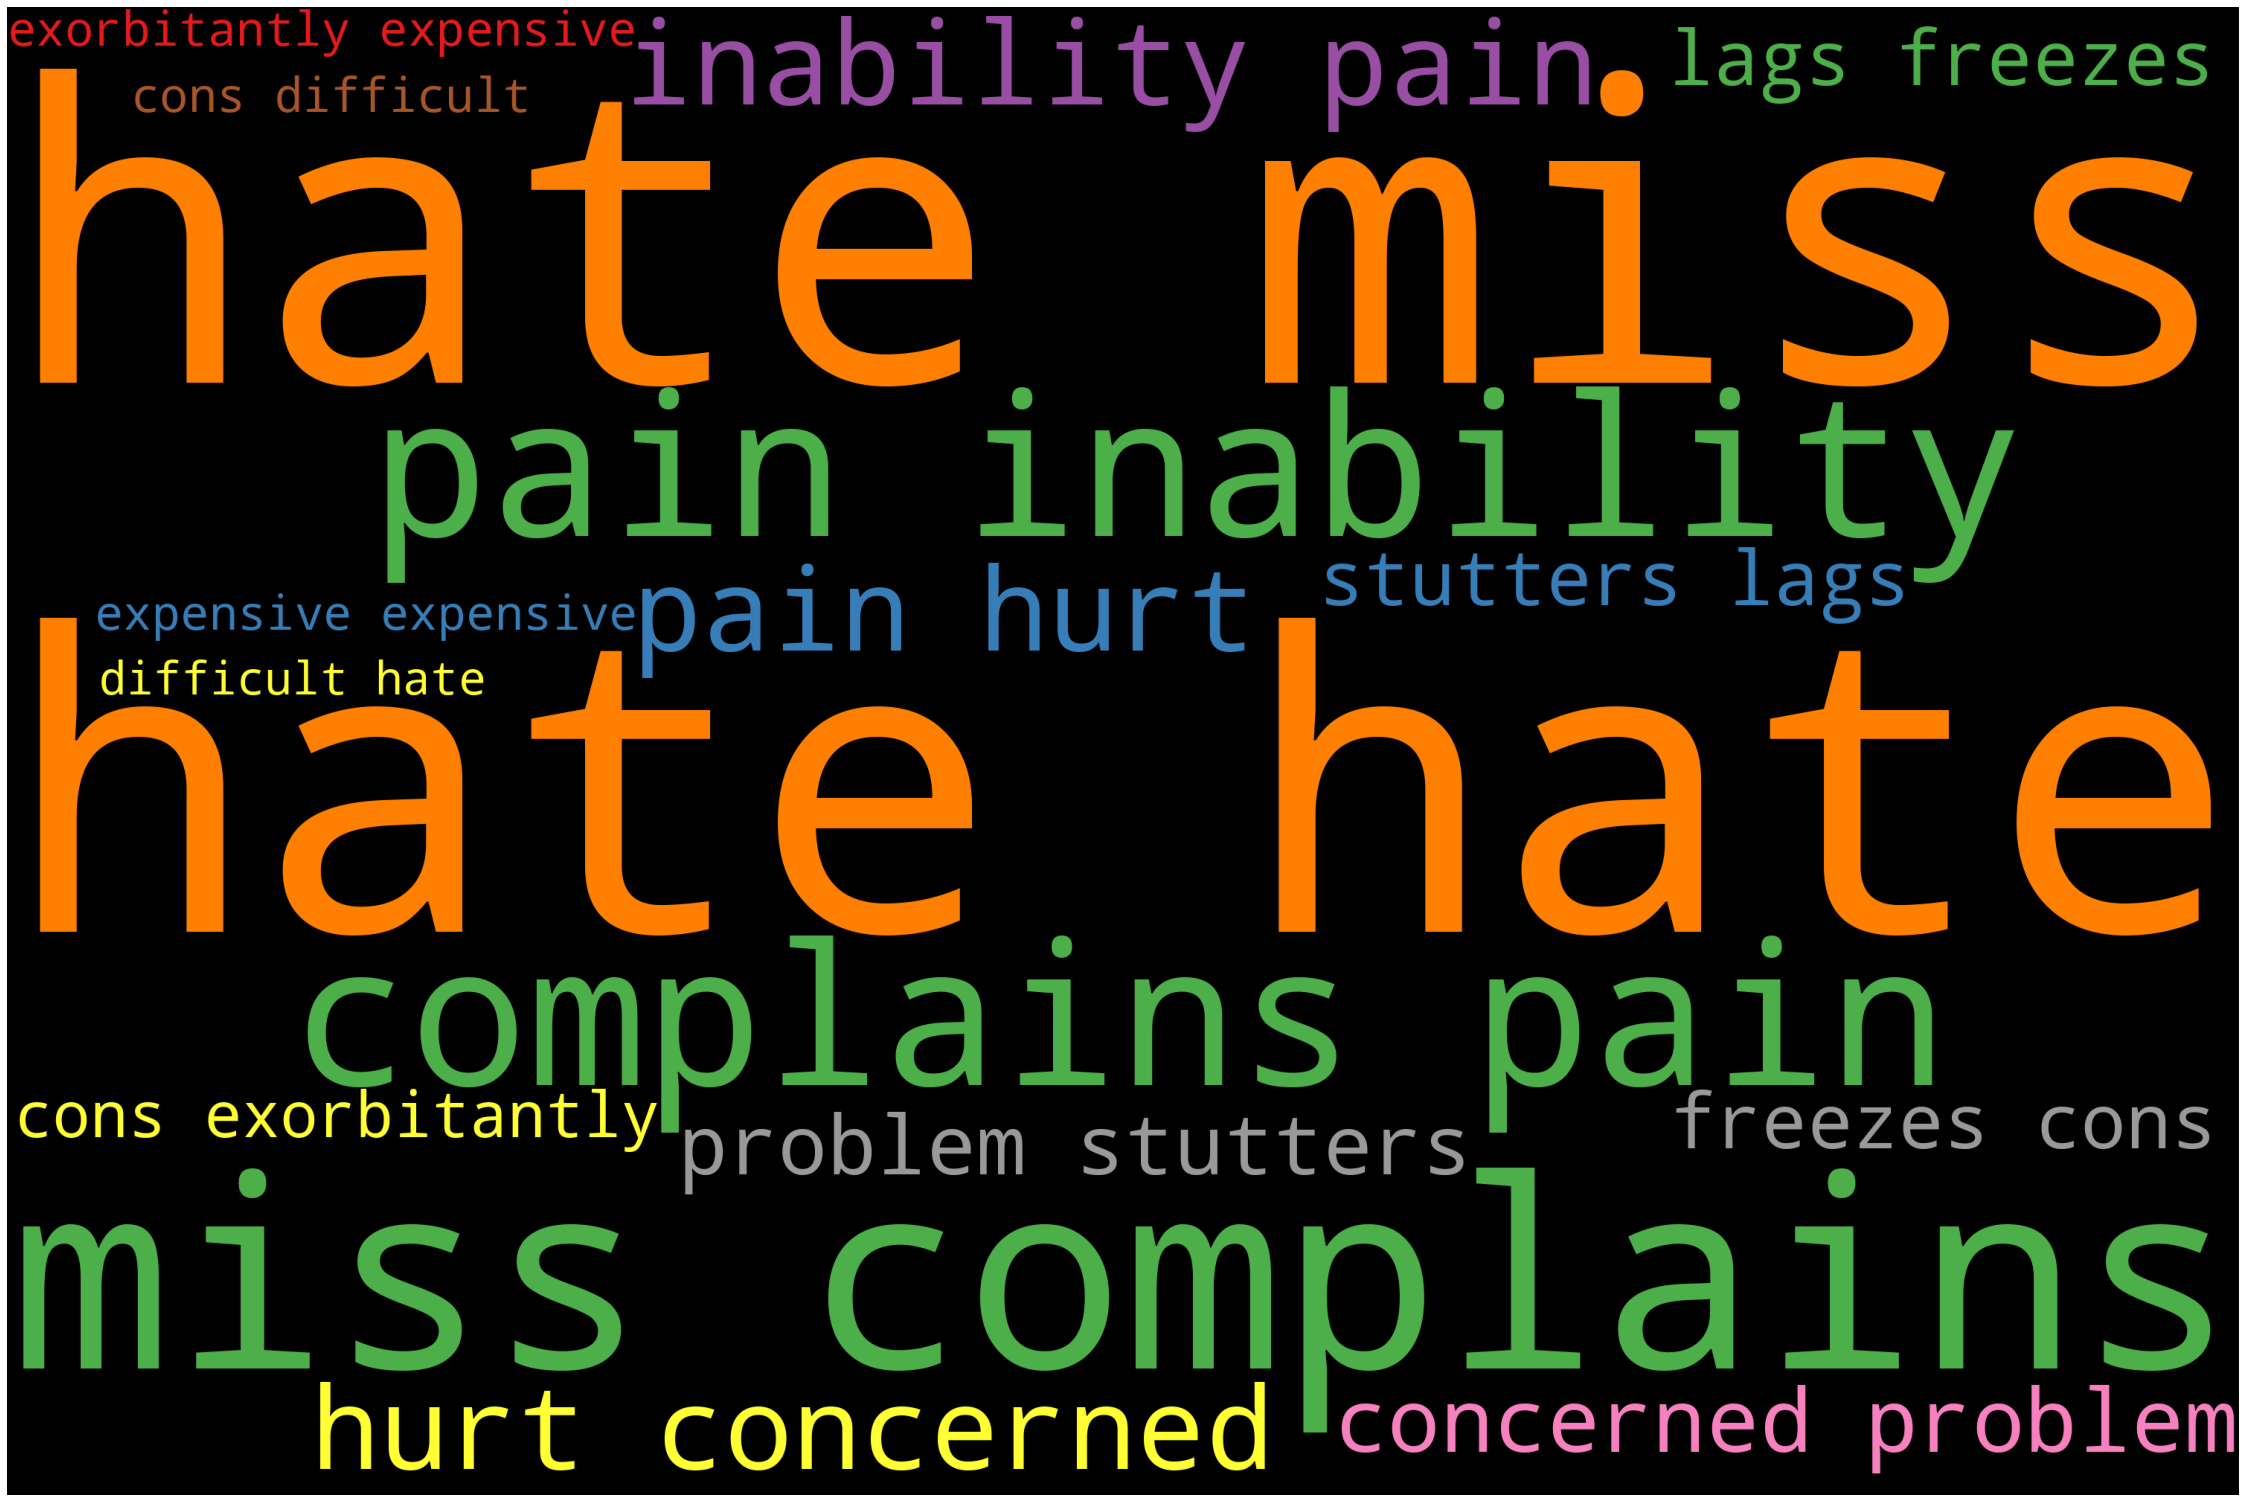

In [65]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_negative)
plot_cloud(wordcloud)

In [66]:
from google.colab import files
uploaded=files.upload()

Saving positive-words.txt to positive-words (1).txt


In [67]:
with open("positive-words.txt","r") as f:
    positive=f.read().split("\n")

In [68]:
positive = positive[35:]

In [69]:
reviews_positive=' '.join([word for word in reviews_without_sw if word in positive])

#WordCloud for Positive Reviews

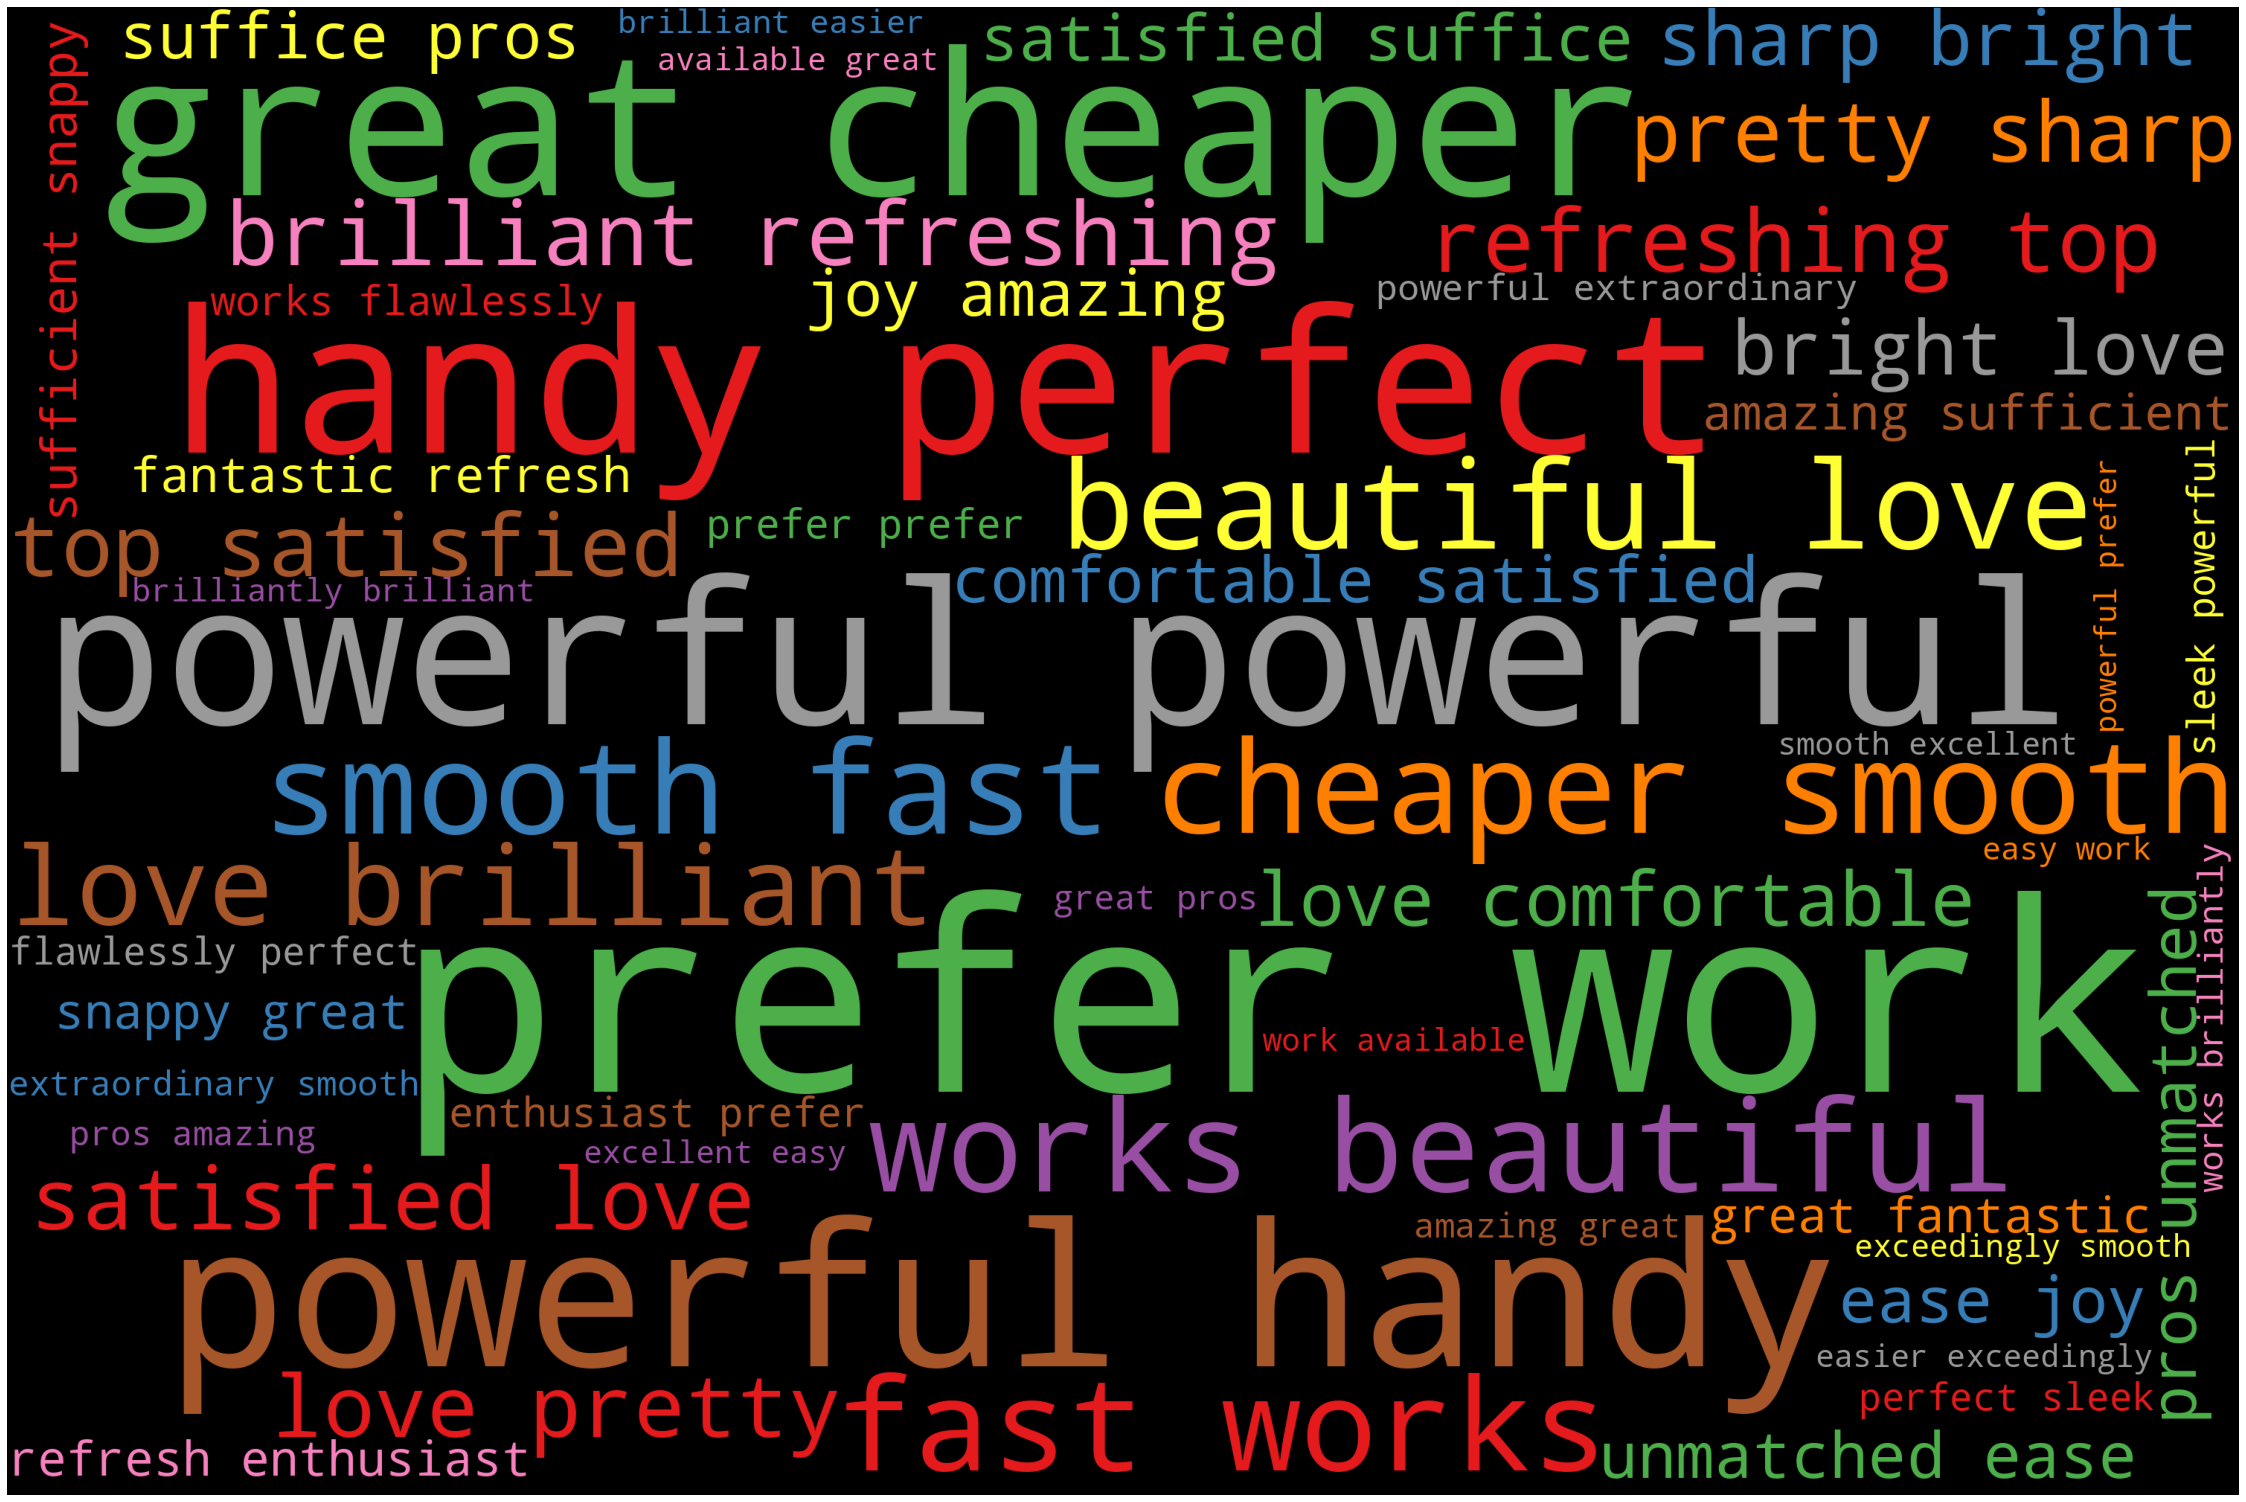

In [70]:
def plot_cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    

from wordcloud import WordCloud, STOPWORDS
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=70,
                   colormap='Set1',stopwords=STOPWORDS).generate(reviews_positive)
plot_cloud(wordcloud)